In [1]:
import state_utils

host = "am"
state_utils.set_host(host)
state_utils.set_midas_db_type("standard")
state_utils.set_cohort("Poyet")

import figure_utils as fu

In [2]:
from parse_midas_data import parse_good_species_list
import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import Roodgar_metadata
from scipy.interpolate import interp1d
from random import shuffle
import seaborn as sns

In [3]:
good_species = parse_good_species_list()

In [4]:
dates = config.dates
all_samples = config.host_samples

In [5]:
pi_dir = "%s/pi/%s/%s" % (config.analysis_directory,config.cohort,host)

In [6]:
pi_df_BT = pd.DataFrame(columns=all_samples,index=good_species)
pi_df_W = pd.DataFrame(columns=all_samples,index=good_species)

for species in good_species:
    try:
        pi_df = pd.read_csv("%s/%s_pi.txt" % (pi_dir,species),index_col=0)
        pi_df_T = pd.DataFrame(columns=all_samples,index=all_samples)
        pi_df_T.loc[pi_df.index,pi_df.columns] = pi_df
        species_dates = dates.loc[pi_df.index].sort_values()
        first_date = species_dates.index[0]
        pi_df_BT.loc[species] = pi_df_T.loc[first_date]
        pi_df_W.loc[species] = np.diag(pi_df_T)
        
    except:
        pass   

In [7]:
pi_df_W = pi_df_W.loc[:,[d for d in dates.index if d in pi_df_W.columns]]
pi_df_BT = pi_df_BT.loc[:,[d for d in dates.index if d in pi_df_BT.columns]]

In [8]:
## threshold by minimum number of samples being greater than 25, as in the strain inference parts of the paper

pi_df_W = pi_df_W.loc[pi_df_W.T.notna().sum() > 25]
pi_df_BT = pi_df_BT.loc[pi_df_W.index]

In [9]:
## calculate the mean between host (BH) diversity of each species, from inter-sample pi in HMP

BH = {}
for species in pi_df_W.index:
    pi_df_BH = pd.read_csv("/u/home/r/rwolff/diversity_ecology/analysis/pi/HMP1-2/%s/%s_pi.txt" % (species,species),index_col=0)
    xz = zip(np.triu_indices(n=pi_df_BH.shape[0],m=pi_df_BH.shape[1])[0],(np.triu_indices(n=pi_df_BH.shape[0],m=pi_df_BH.shape[1])[1]))
    BH[species] = 1-(pi_df_BH.values[xz].ravel().mean()-np.diag(pi_df_BH.values).mean())/pi_df_BH.values[xz].ravel().mean()
BH = pd.Series(BH)


In [10]:
Fst = 1-(pi_df_BT - pi_df_W)/pi_df_BT
Fst_plot = Fst.copy()

In [11]:
species_samples = Fst_plot.columns
Fst_plot.columns = dates.loc[species_samples]


In [14]:
Fst

,SRR9224357,SRR9224359c,SRR9224362,SRR9224245,SRR9224364,SRR9224363c,SRR9224365,SRR9224525,SRR9224526,SRR9224523c,...,SRR9224103,SRR9224108,SRR9224107,SRR9224261,SRR9224319,SRR9224198,SRR9224199,SRR9224204,SRR9224205,SRR9224202
Bacteroides_vulgatus_57955,1,0.962249,0.736012,1.01114,1.03128,1.04654,1.01468,1.02008,0.997472,0.884744,...,1.0535,1.0671,1.06021,1.05411,1.06492,1.03287,1.02467,1.03096,1.03258,1.03828
Bacteroides_uniformis_57318,1,0.802611,1.09994,0.901159,0.825768,0.860254,0.746999,0.704063,0.769008,0.773557,...,0.766845,0.634452,0.704396,1.22884,0.687514,0.740473,0.729964,0.708302,0.696339,0.717661
Eubacterium_rectale_56927,1,1.00252,NaN,NaN,NaN,0.981897,0.880201,1.01239,0.957064,0.999111,...,NaN,0.929375,0.84048,0.946208,0.947285,0.894161,0.939608,0.891093,0.900085,0.919608
Bacteroides_ovatus_58035,1,0.822321,0.817345,1.27184,0.796045,0.77359,0.767765,0.745588,0.796407,0.779978,...,0.821388,0.850862,0.853267,NaN,0.831708,0.828521,0.793317,0.876308,0.859835,0.844531
Bacteroides_xylanisolvens_57185,1,0.774833,0.737898,NaN,0.730944,0.809826,0.718999,0.724585,0.74331,0.797629,...,0.713763,0.759086,0.748164,NaN,0.728918,0.709158,0.678566,0.763723,0.760561,0.771247
Bacteroides_stercoris_56735,1,0.760615,0.732043,NaN,0.789594,0.763732,0.781941,0.774033,0.812153,0.837952,...,NaN,0.678774,0.686325,NaN,0.730134,0.701764,0.760318,0.725818,0.799207,0.765427
Parabacteroides_merdae_56972,NaN,1,NaN,NaN,0.832606,0.471716,0.42585,0.627296,0.856384,0.715276,...,0.743198,0.748254,0.776981,NaN,0.753199,NaN,NaN,0.810185,0.745637,0.832455
Ruminococcus_bromii_62047,1,0.692231,NaN,NaN,NaN,0.778683,NaN,0.776878,0.821261,0.643491,...,NaN,NaN,NaN,NaN,0.744803,0.67758,0.800686,NaN,NaN,0.776549
Ruminococcus_bicirculans_59300,NaN,1,0.869925,NaN,NaN,0.884966,NaN,NaN,0.751483,0.761521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_fragilis_54507,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.832142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.845626,0.750922


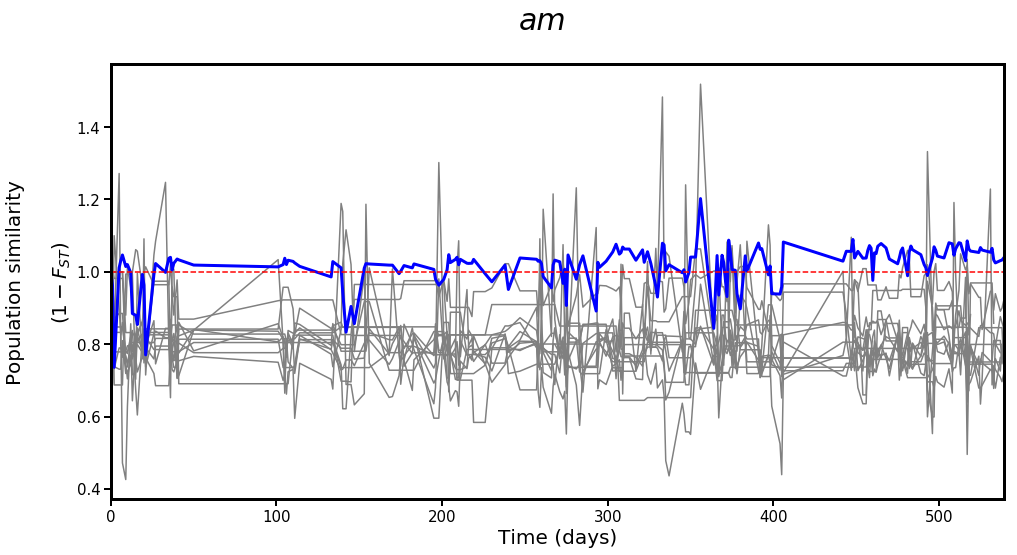

In [18]:
species = "Bacteroides_vulgatus_57955"

fig,ax = plt.subplots(figsize=(16,8))
fig.suptitle(host,fontstyle="italic",size=30)
(Fst_plot.T).fillna(method="bfill").rolling(1).mean().plot(legend=None,ax=ax,color="grey",label=None);
(Fst_plot.T).fillna(method="bfill").rolling(1).mean()[species].plot(legend=None,ax=ax,color="blue",lw=3,label=species);

ax.set_xlabel("Time (days)",size=20)
#ax.semilogy()
#ax.set_ylim([1e-2,5*1e0])
ax.axhline(1,color="red",ls="--")
ax.set_ylabel("Population similarity" + "\n" + "\n" + r"$(1 - F_{ST})$",size=20)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)

ax.tick_params('both', length=7, width=2, which='major')
ax.tick_params('both', length=3, width=2, which='minor')


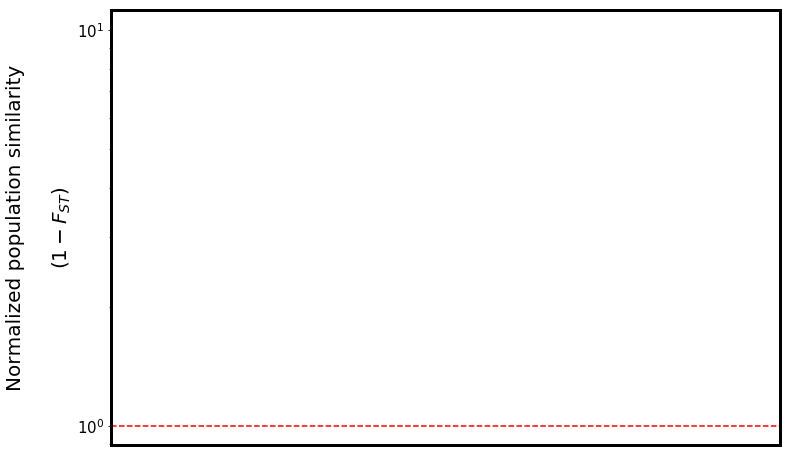

In [25]:
fig,ax = plt.subplots(figsize=(12,8))
(BH/Fst_plot).fillna(method="bfill").rolling(3).mean().plot(legend=None,ax=ax,color="grey");
ax.set_xticks([])
ax.semilogy()
#ax.set_ylim([1e-1,1e1])
ax.axhline(1,color="red",ls="--")
ax.set_ylabel("Normalized population similarity" + "\n" + "\n" + r"$(1 - F_{ST})$",size=20)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)

In [21]:
all_arr = [Fst.loc[d][~np.isnan(list(Fst.loc[d]))].values for d in Fst.T]

In [29]:
(BH/Fst_plot.T).T

timepoint,0,1,2,5,6,7,9,10,12,13,...,524,525,526,531,532,533,534,537,538,539
Bacteroides_fragilis_54507,NaN,NaN,NaN,NaN,NaN,0.188516,NaN,NaN,NaN,0.226543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22293,0.251046
Bacteroides_ovatus_58035,0.222104,0.270095,0.271739,0.174633,0.27901,0.287109,0.289287,0.297891,0.278883,0.284757,...,0.270401,0.261034,0.260299,NaN,0.267046,0.268073,0.279969,0.253455,0.25831,0.262991
Bacteroides_stercoris_56735,0.100242,0.131791,0.136934,NaN,0.126954,0.131253,0.128196,0.129506,0.123427,0.119627,...,NaN,0.147681,0.146056,NaN,0.137293,0.142843,0.131842,0.138109,0.125427,0.130962
Bacteroides_uniformis_57318,0.137185,0.170924,0.124721,0.152232,0.166131,0.159471,0.183649,0.194848,0.178393,0.177344,...,0.178896,0.216227,0.194756,0.111639,0.199538,0.185267,0.187935,0.193682,0.197009,0.191156
Bacteroides_vulgatus_57955,0.178624,0.185631,0.242691,0.176656,0.173206,0.17068,0.17604,0.175108,0.179076,0.201893,...,0.169553,0.167392,0.16848,0.169454,0.167735,0.172939,0.174323,0.173259,0.172988,0.172037
Bacteroides_xylanisolvens_57185,0.190333,0.245644,0.25794,NaN,0.260394,0.23503,0.26472,0.262679,0.256062,0.238624,...,0.266662,0.25074,0.2544,NaN,0.261117,0.268393,0.280493,0.249217,0.250254,0.246786
Barnesiella_intestinihominis_62208,NaN,NaN,NaN,NaN,NaN,0.0819848,NaN,0.111238,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109196,NaN
Eubacterium_rectale_56927,0.210638,0.210109,NaN,NaN,NaN,0.214522,0.239307,0.20806,0.220088,0.210826,...,NaN,0.226645,0.250617,0.222613,0.22236,0.235571,0.224177,0.236382,0.23402,0.229052
Faecalibacterium_prausnitzii_57453,NaN,0.202867,NaN,NaN,NaN,0.29518,NaN,NaN,NaN,0.204144,...,NaN,NaN,NaN,NaN,0.209294,0.236484,NaN,NaN,NaN,NaN
Parabacteroides_merdae_56972,NaN,0.199651,NaN,NaN,0.23979,0.423244,0.468829,0.318272,0.233132,0.279124,...,0.268638,0.266822,0.256957,NaN,0.26507,NaN,NaN,0.246426,0.267759,0.239834


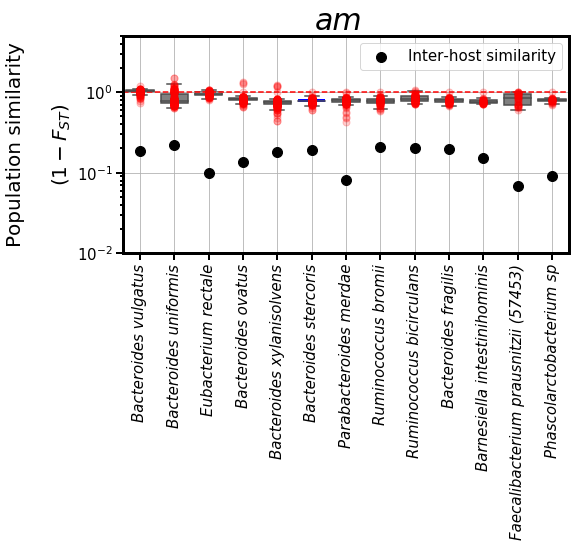

In [23]:
fig,ax=plt.subplots(figsize=(8,4))

fig.suptitle(host,fontstyle="italic",size=30)

c = ["grey","grey","grey","grey","grey","blue","grey","grey","grey","grey","grey","grey"]
#c = "grey"
box = sns.boxplot(data=all_arr,showfliers=False,color="grey")

mybox = box.artists[5]

mybox.set_facecolor('blue')
mybox.set_edgecolor('black')
mybox.set_linewidth(0)

for x in range(len(all_arr)):
    ax.scatter(np.ones(len(all_arr[x]))*x, all_arr[x], color="red",s=50, alpha=0.2,zorder=10)

ax.scatter(range(len(BH)),BH.values,s=100,zorder=20,color="k",label="Inter-host similarity");
 
ax.grid(True)
    
ax.semilogy();

ax.semilogy()
ax.set_ylim([1e-2,5*1e0])
ax.axhline(1,color="red",ls="--")
ax.set_ylabel("Population similarity" + "\n" + "\n" + r"$(1 - F_{ST})$",size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

species_names = [fu.get_pretty_species_name(s) for s in pi_df_W.index]
ax.set_xticks(range(len(species_names)))
ax.set_xticklabels(species_names,rotation=90,fontstyle='italic')

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)

ax.tick_params('both', length=7, width=2, which='major')
ax.tick_params('both', length=3, width=2, which='minor')

handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles=handles, prop={'size': 15})


In [ ]:
handles